<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/2_GPT_evaluate_batch_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

Esta notebook se usa para recuperar los batch de GPT y evaluarlos en relación a los datos de test para la clasificacion multietiqueta

**Natalia Dedandi**





La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [2]:
!pip install datasets seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      S

In [3]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [4]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)


GPT no acepta archivos tan grandes por lo que se dividó la clasificacion en dos partes. Aqui se retoman los dos y se consolidan en un dataframe conjunto

BATCH ID Parte 1: batch_lbqgkIXz96h4G82byrWsKiLf

BATCH ID Parte 2:batch_whoRan66MYdbw5OhNxJqFHhu








In [5]:
batch_job1 = client.batches.retrieve('batch_lbqgkIXz96h4G82byrWsKiLf')
batch_job1.status


'completed'

In [6]:
batch_job2 = client.batches.retrieve('batch_whoRan66MYdbw5OhNxJqFHhu')
batch_job2.status


'completed'

In [7]:
##batch job 1

output_file_id = batch_job1.output_file_id
# We should check that there are succesfull results
	# It could be the case that all responses are errors.
if output_file_id:
	outputs = client.files.content(output_file_id).content
	result_file_name = "outputs1.jsonl"

	with open(result_file_name, 'wb') as file:
	    file.write(outputs)



In [8]:
import pandas as pd

data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results1 = pd.DataFrame(data_results)

In [9]:
df_results1[1:10]

,id,sentiment_gpt
1,397704,NOT HATEFUL
2,397705,POLITICS
3,397706,POLITICS
4,397707,NOT HATEFUL
5,397708,POLITICS
6,397709,NOT HATEFUL
7,397710,POLITICS
8,397711,NOT HATEFUL
9,397712,NOT HATEFUL


In [12]:
len(df_results1)

5671

In [10]:
##batch job 2

output_file_id = batch_job2.output_file_id
# We should check that there are succesfull results
	# It could be the case that all responses are errors.
if output_file_id:
	outputs = client.files.content(output_file_id).content
	result_file_name = "outputs2.jsonl"

	with open(result_file_name, 'wb') as file:
	    file.write(outputs)

In [11]:
import pandas as pd

data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results2 = pd.DataFrame(data_results)

In [13]:
df_results2[1:10]

,id,sentiment_gpt
1,406491,WOMEN
2,406492,WOMEN
3,406493,NOT HATEFUL
4,406494,RACISM
5,406495,LGBTI
6,406496,NOT HATEFUL
7,406497,RACISM
8,406498,RACISM
9,406499,NOT HATEFUL


In [14]:
len(df_results2)

5671

In [43]:
# prompt: merge df_results1 with df_results2

df_results = pd.concat([df_results1, df_results2], ignore_index=True)


In [44]:
len(df_results)

11342

In [45]:
df_results["id"] = pd.to_numeric(df_results["id"])

In [46]:
df_results.to_csv('outputs_multi_1.csv',index=False)

In [47]:
df_results.groupby(['sentiment_gpt']).size()

,0
sentiment_gpt,
APPEARENCE,227
"APPEARENCE, CRIMINAL",3
"APPEARENCE, LGBTI",1
CALLS,1096
"CALLS, CLASS, RACISM",1
CLASS,197
"CLASS, APPEARENCE",2
"CLASS, CALLS",1
"CLASS, CRIMINAL",3


In [48]:
import re

def word_in_text(word, text):
    # Use re.search() to find the word in the text
    pattern = r'\b{}\b'.format(re.escape(word))  # \b matches word boundaries
    match = re.search(pattern, text, flags=re.IGNORECASE)  # Ignore case for case-insensitive matching

    if match:
        return True
    else:
        return False

In [49]:
# ajustar los valores y crear una variable binaria entera 1 y 0
df_results['CALLS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('calls',x) else 0)
df_results['WOMEN_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('women',x) else 0)
df_results['LGBTI_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('lgbti',x) else 0)
df_results['RACISM_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('racism',x) else 0)
df_results['CLASS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('class',x) else 0)
df_results['POLITICS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('politics',x) else 0)
df_results['DISABLED_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('disabled',x) else 0)
df_results['APPEARANCE_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('appearance',x) else 0)
df_results['CRIMINAL_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('criminal',x) else 0)

In [50]:
# prompt: show 30 rows of df_resutls
df_results.to_csv('outputs_multi_1.csv',index=False)


In [52]:
df_results['HATEFUL_pred']= df_results[['CALLS_pred','WOMEN_pred','LGBTI_pred','RACISM_pred','CLASS_pred','POLITICS_pred','DISABLED_pred','APPEARANCE_pred','CRIMINAL_pred']].max(axis=1)

df_results.groupby(['HATEFUL_pred']).size()

,0
HATEFUL_pred,
0,7696
1,3646


In [26]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [27]:
df_test = pd.DataFrame(ds1['test'])
df_test[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0


In [53]:
df_results[0:10]

,id,sentiment_gpt,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARANCE_pred,CRIMINAL_pred,HATEFUL_pred
0,397703,CALLS,1,0,0,0,0,0,0,0,0,1
1,397704,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
2,397705,POLITICS,0,0,0,0,0,1,0,0,0,1
3,397706,POLITICS,0,0,0,0,0,1,0,0,0,1
4,397707,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
5,397708,POLITICS,0,0,0,0,0,1,0,0,0,1
6,397709,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
7,397710,POLITICS,0,0,0,0,0,1,0,0,0,1
8,397711,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
9,397712,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0


In [54]:
len(df_test)

11343

In [55]:
len(df_results)

11342

In [56]:
#junto los dos dataframes
df_hateful=df_test.merge(df_results,how='left', on='id')
df_hateful[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,...,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARANCE_pred,CRIMINAL_pred,HATEFUL_pred
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
len(df_hateful)

11343

In [58]:
# prompt: delete a row from df_hateful if HATEFUL_pred is NA

df_hateful = df_hateful.dropna(subset=['HATEFUL_pred'])


In [59]:
len(df_hateful)

11342

In [60]:
df_hateful.groupby(['HATEFUL_pred']).size()

,0
HATEFUL_pred,
0.0,7696
1.0,3646


In [61]:
df_hateful['HATEFUL_pred'] = df_hateful['HATEFUL_pred'].astype(int)
df_hateful['CALLS_pred'] = df_hateful['CALLS_pred'].astype(int)
df_hateful['WOMEN_pred'] = df_hateful['WOMEN_pred'].astype(int)
df_hateful['LGBTI_pred'] = df_hateful['LGBTI_pred'].astype(int)
df_hateful['RACISM_pred'] = df_hateful['RACISM_pred'].astype(int)
df_hateful['CLASS_pred'] = df_hateful['CLASS_pred'].astype(int)
df_hateful['POLITICS_pred'] = df_hateful['POLITICS_pred'].astype(int)
df_hateful['DISABLED_pred'] = df_hateful['DISABLED_pred'].astype(int)
df_hateful['APPEARANCE_pred'] = df_hateful['APPEARANCE_pred'].astype(int)
df_hateful['CRIMINAL_pred'] = df_hateful['CRIMINAL_pred'].astype(int)



<ipython-input-62-ed43efad24f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')


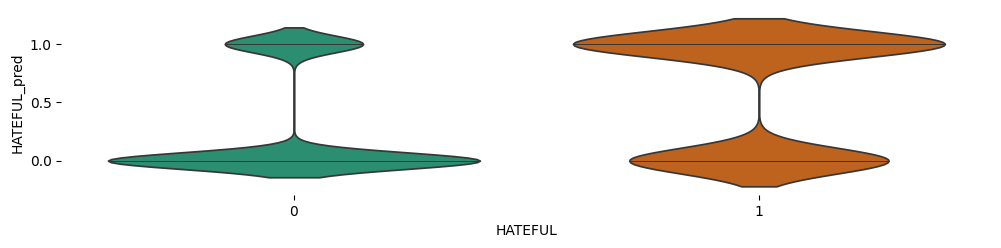

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['HATEFUL_pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Probando los resultados en una de las etiquetas: CALLS

<ipython-input-63-3f0ffa9f0249>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='CALLS', y='CALLS_pred', inner='stick', palette='Dark2')


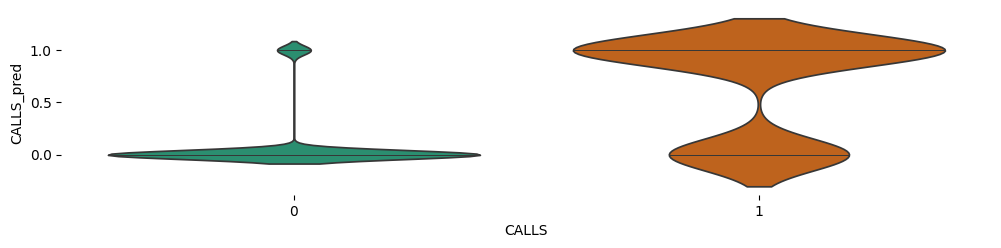

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['CALLS_pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='CALLS', y='CALLS_pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [65]:
# prompt: print names of df_hateful columns

print(df_hateful.columns)


Index(['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS',
       'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED',
       'APPEARANCE', 'CRIMINAL', 'sentiment_gpt', 'CALLS_pred', 'WOMEN_pred',
       'LGBTI_pred', 'RACISM_pred', 'CLASS_pred', 'POLITICS_pred',
       'DISABLED_pred', 'APPEARANCE_pred', 'CRIMINAL_pred', 'HATEFUL_pred'],
      dtype='object')


<ipython-input-66-7cb3ce66ae7b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
<ipython-input-66-7cb3ce66ae7b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
<ipython-input-66-7cb3ce66ae7b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
<ipython-input-66-7cb3ce66ae7b>

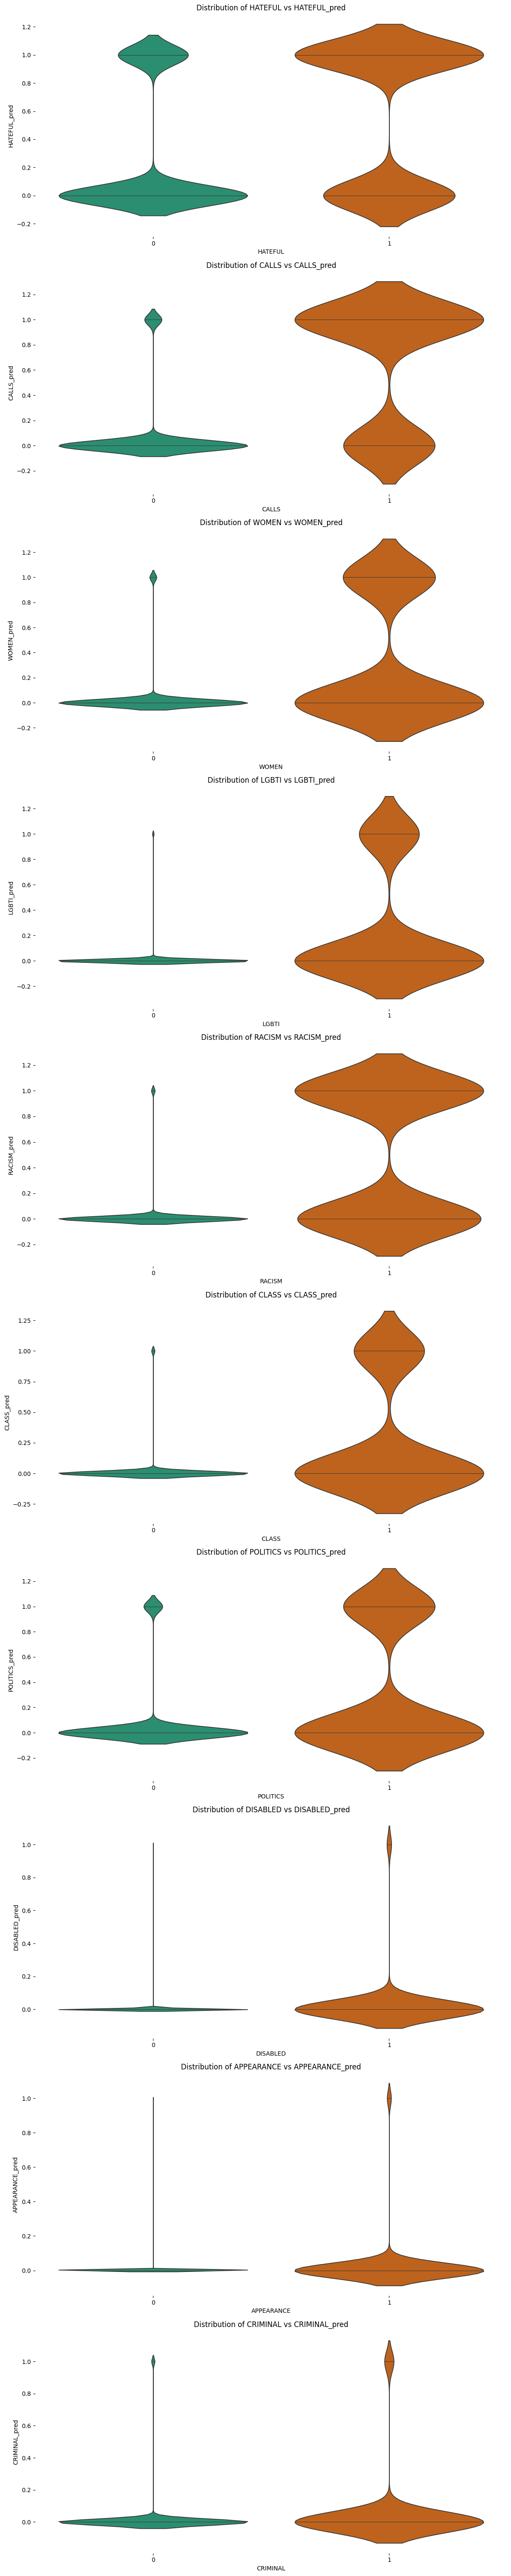

In [66]:
# prompt: construc a grid of violinplot for features: 'HATEFUL', 'CALLS',  'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL' in df_hateful and the same column that have the text '_pred'

# Assuming you want to compare the distribution of predicted and actual labels
features = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 6 * len(features)))

for i, feature in enumerate(features):
    sns.violinplot(df_hateful, x=feature, y=feature + '_pred', inner='stick', palette='Dark2', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} vs {feature}_pred')
    sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[i])

plt.tight_layout()
plt.show()



In [ ]:
df_hateful[0:2]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,...,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARENCE_pred,CRIMINAL_pred,HATEFUL_pred
0,397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Example data (replace with your actual data)
y_multi_true = [df_hateful['CALLS'], df_hateful['WOMEN'], df_hateful['LGBTI'], df_hateful['RACISM'], df_hateful['CLASS'], df_hateful['POLITICS'], df_hateful['DISABLED'], df_hateful['APPEARANCE'], df_hateful['CRIMINAL']]
y_multi_pred = [df_hateful['CALLS_pred'], df_hateful['WOMEN_pred'], df_hateful['LGBTI_pred'], df_hateful['RACISM_pred'], df_hateful['CLASS_pred'], df_hateful['POLITICS_pred'], df_hateful['DISABLED_pred'], df_hateful['APPEARENCE_pred'], df_hateful['CRIMINAL_pred']]



CALCULO LAS METRICAS DE CADA UNA DE LAS ETIQUETAS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compare_model_predictions(y_true, y_pred):
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
    metrics['AUC'] = roc_auc_score(y_true, y_pred, average='weighted')
    print(metrics)

CALCULO LAS METRICAS DE TODO EL MODELO CONJUNTO

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def calculate_multiclass_metrics(y_true, y_pred):
    """
    Calculate and print metrics for a multiclass classification problem.

    Parameters:
    y_true (list or array): True labels
    y_pred (list or array): Predicted labels

    Returns:
    dict: Dictionary containing accuracy, precision, recall, and F1-score for each class
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
  #  conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    # Print metrics
    print("Accuracy: ", accuracy)
    print("\nPrecision: ", precision)
    print("\nRecall: ", recall)
    print("\nF1-score: ", f1)
 #   print("\nConfusion Matrix:\n", conf_matrix)
  #  print("\nClassification Report:\n", class_report)

    # Return metrics in a dictionary
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
        #,
        #'confusion_matrix': conf_matrix,
   #     'classification_report': class_report
    }
    return metrics

In [ ]:
metrics_hateful = calculate_multiclass_metrics(y_true, y_pred)
metrics_hateful

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefi

Accuracy:  0.0

Precision:  0.4566640481801518

Recall:  0.28908091123330715

F1-score:  0.3401152134066509


{'accuracy': 0.0,
 'precision': 0.4566640481801518,
 'recall': 0.28908091123330715,
 'f1_score': 0.3401152134066509}